In [1]:
import numpy as np
import pandas as pd

In [10]:
data_train = pd.read_csv('cs-training.csv', index_col=0)
data_train.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cs-training.csv'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data_train_fill_na = data_train.fillna(data_train.mean())

X_train = np.array(data_train_fill_na.iloc[:, 1:])
y_train = np.array(data_train_fill_na.iloc[:, 0])
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)

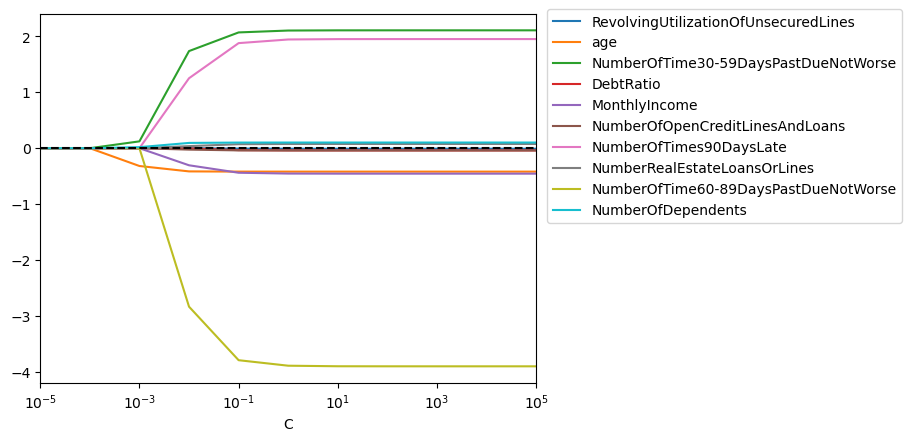

In [4]:
weights, params = [], []
for c in range(-5, 6):
    lr = LogisticRegression(C=10.**c, penalty='l1', solver='liblinear')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)
weights = np.array(weights)  


fig = plt.figure()
ax = plt.subplot(111)
for i in range(weights.shape[1]):
    plt.plot(params, weights[:, i], 
             label=data_train_fill_na.columns[i+1])
    
plt.axhline(0, color='black', linestyle='--')
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
         ncol = 1, fancybox=True)

plt.show()

**As the graph shows, when $$C \rightarrow 10^{-3}$$ 
*Age* and *NumberOfTime30-59DaysPastDueNotWorse* are the most important features**

In [5]:
# Select two features
X_2_features = X_train_std[:, [
    data_train_fill_na.columns.get_loc('age') - 1,
    data_train_fill_na.columns.get_loc('NumberOfTime30-59DaysPastDueNotWorse') - 1]
                          ] 

In [6]:
# Use LR to classify

acc = []
indics = []

for _ in range(-5, 6):
    lr = LogisticRegression(C=10 ** _)
    lr.fit(X_2_features, y_train)
    acc.append(lr.score(X_2_features, y_train))
    indics.append(10**_)
    print(indics[-1], ',', acc[-1])

1e-05 , 0.93316
0.0001 , 0.9333133333333333
0.001 , 0.9333266666666666
0.01 , 0.9333266666666666
0.1 , 0.9333266666666666
1 , 0.9333266666666666
10 , 0.9333266666666666
100 , 0.9333266666666666
1000 , 0.9333266666666666
10000 , 0.9333266666666666
100000 , 0.9333266666666666


In [7]:
lr = LogisticRegression(C=1)
lr.fit(X_2_features, y_train)
lr.score(X_2_features, y_train)

0.9333266666666666

In [8]:
# Define plot function
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1,  xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl,1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolors='black')
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='none', edgecolors='black', alpha=1.0,
                   linewidths=1, marker='o',
                   s=100, label='test set')

C:\Users\22938\AppData\Local\Temp\ipykernel_16772\4131078290.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl,1],


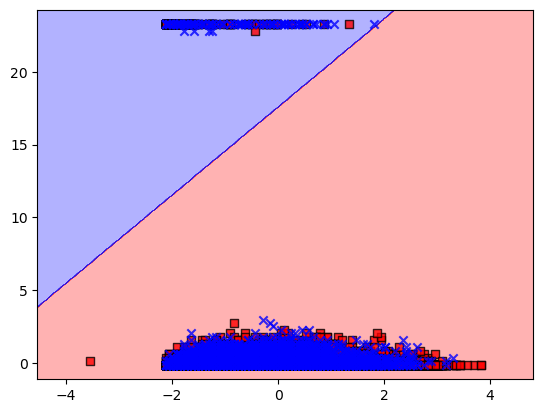

In [9]:
plot_decision_regions(X_2_features, y_train, lr)